## Webscraping Part 2

In [5]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
warnings.simplefilter("ignore")
import nltk
nltk.download('all')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from textblob import Word
# Machine Learning
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

## 1. Data collection and cleaning: 

In [7]:
data= pd.read_csv("webscraping_results_assignmnet3.csv")

data.drop_duplicates(keep='first', inplace=True)
#remove all rows without Job Description
data = data[data["Description"] != "None"]

## 2. Exploratory data analysis and feature engineering:

In [8]:
## Lower case
data['Description'] = data['Description'].apply(lambda x: " ".join(x.lower()for x in x.split()))
data['Title'] = data['Title'].apply(lambda x: " ".join(x.lower()for x in x.split()))
## remove tabulation and punctuation
data['Description'] = data['Description'].str.replace('[^\w\s]',' ')
## digits
data['Description'] = data['Description'].str.replace('\d+', '')

#remove stop words
stop = stopwords.words('english')
data['Description'] = data['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

data = data.reset_index(drop=True)
data

,Title,Company,Location,Rating,Date,Salary,Description,Links
0,data analyst,Softnice Inc.,+1 locationRemote,4.0,PostedPosted 30+ days ago,"$100,000 - $200,000 a year",verbal written communication skills problem so...,https://www.indeed.com/company/Softnice-Inc/jo...
1,associate ecommerce business analyst,Uline,"Pleasant Prairie, WI+3 locations",3.1,PostedPosted 10 days ago,NaN,analyze customer comments identify website eco...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
2,jr. data scientist,Talentheed Inc,Remote,4.6,PostedPosted 2 days ago,"$56,951 - $119,187 a year",apply data sets create unique data models algo...,https://www.indeed.com/company/Talentheed-Inc/...
3,data analyst,Zora,Remote,NaN,PostedPosted 30+ days ago,From $80 an hour,specific project experience workday erp system...,https://www.indeed.com/company/Zora-Corporatio...
4,junior data analyst,Talentheed Inc,Remote,4.6,Hiring ongoing,"$38,963 - $79,580 a year",develops database logic extract transform requ...,https://www.indeed.com/company/Talentheed-Inc/...
...,...,...,...,...,...,...,...,...
1472,pipeline direct hire: statistician / engineer ...,"PDS Defense, Inc.","Camden, AR 71701",NaN,PostedPosted 30+ days ago,NaN,requires bachelor degree preferably statistics...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1473,senior business analyst,Providence,Texas,3.6,PostedPosted 9 days ago,NaN,year lawson pmm oracle cloud end user analyst ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1474,hybrid accounting analyst,Aston Carter,"Des Moines, IA 50301 (King-Irving Park area)+1...",3.0,PostedPosted 5 days ago,$26 - $29 an hour,keep management informed progress projects tas...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1475,cloud data engineer,Kaztronix,United States,3.1,PostedPosted 23 days ago,NaN,expert level knowledge cloud data engineering ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...


In [9]:

# dictionary with skills used to parse job descriptions
skills_dict = {
        # tech skills
        'Excel': ['excel'],
        'Python': ['python',"python", "pandas", "numpy", "matplotlib" , 
                    "scikit learn", 'scikitlearn', 'sklearn', 
                    'beautifulsoup ', 'scipy','xgboost'],
        'R': ['r ', ' r ', 'r,', 'r/'],
        'Java': ['java', 'jvm'],
        'Scala': ['scala'],
        'C/C++': ['c/c++', 'c++', ' c '],
        'MATLAB': ['matlab'],
        'SAS': ['sas'],
        'SQL/databases': ['sql', 'databases'],
        'Oracle':['oracle'],
        'SPSS': ['spss'],
        'Machine Learning': ['machine learning', 'ml'],
        'Data Mining/Analytics': ['data mining', 'dm', 'analytics'],
        'NLP': ['natural language processing', 'nlp'],
        'Data Visualisation': ['visualisation', 'visualization','power bi','tableau'],
        'Big Data': ['big data', 'spark', 'kafka', 'hive', 'aws', 'google cloud'
                     'hadoop', 'mapreduce', 'hbase', 'azure',
                     'coudera', 'hortonworks'],
        'Support Vector Machines': ['svm', 'support vector machines'],
        'Neural Networks': ['neural networks', 'ann', 'mlp', 'cnn', 'pytorch',
                            'tensorflow', 'keras', 'theano'],
        'Git':['github', 'git', 'version control'],
        'Statistics': ['statistics', 'probability', 'statistical modeling' , "statistical analysis"],
        'Mathematics': ['mathematics' , "math",  'algebra'],
        # soft skills
        'presentation' : ['communication', 'presentation'],
        'management' : ['management', 'Data management'],
        'decision making' : ['decision making', 'decision analysis'],
        'problem solving': ['problem solving'],
        'project management': ['project management'],
        'leadership': ['leadership'],
        'consulting': ['consulting', 'consultant']
    }
#extracting skills
skills_found_dict = {}
for i in range(data.shape[0]):
  skills_found_dict[i] = {} 
  for skill_category, skills in skills_dict.items():
              category_found = 0  
              for skill in skills:        
                  if data["Description"][i].find(skill) != -1: 
                      category_found = 1
              skills_found_dict[i][skill_category] = category_found 

skills = pd.DataFrame(skills_found_dict).T
skills

,Excel,Python,R,Java,Scala,C/C++,MATLAB,SAS,SQL/databases,Oracle,...,Git,Statistics,Mathematics,presentation,management,decision making,problem solving,project management,leadership,consulting
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1473,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1475,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


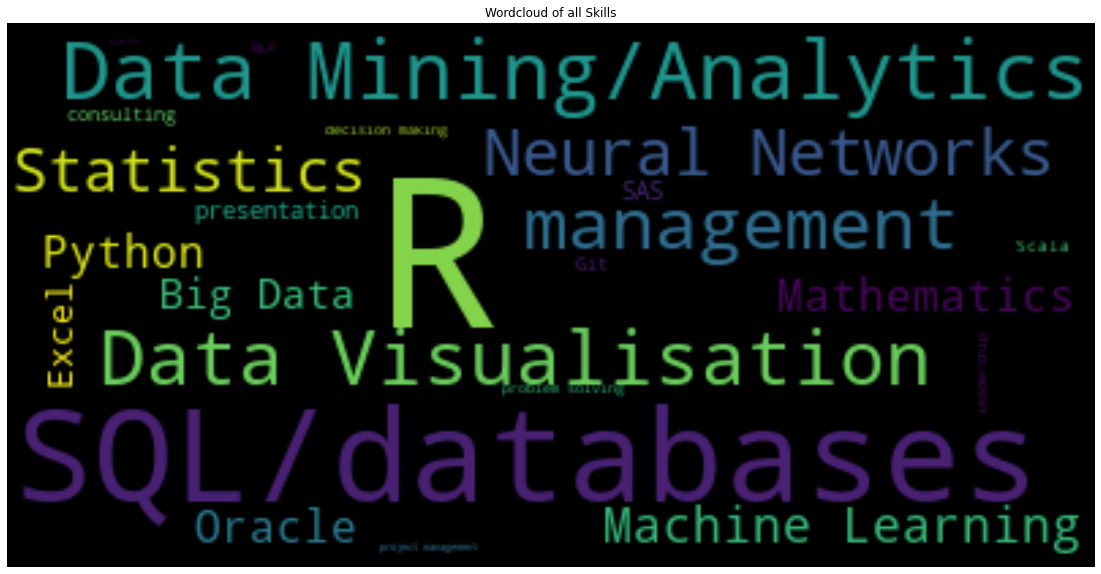

In [10]:
sum_skills_all = list(skills.sum(axis=0))
skills_all = list(skills.columns)
frequency = {}
for a, x in zip(skills_all,sum_skills_all):
    frequency[a] = x

wordcloud = WordCloud(random_state =1624)
wordcloud.generate_from_frequencies(frequencies=frequency)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of all Skills")
plt.show()

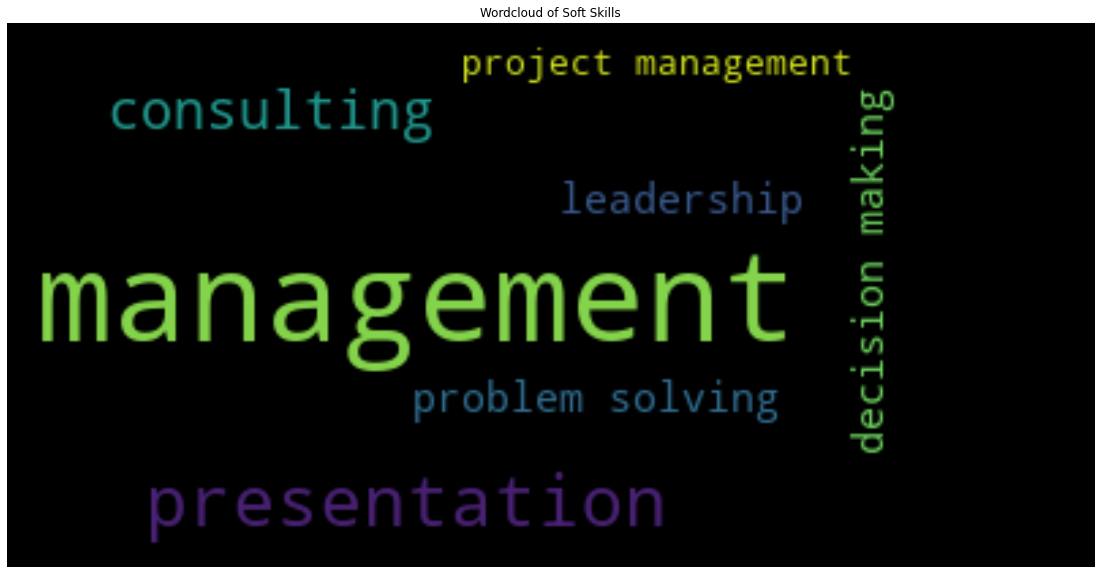

In [11]:
skills_soft = skills[['presentation', 'management', 'decision making',
       'problem solving', 'project management', 'leadership',
       'consulting']]
skills_soft

sum_skills_all = list(skills_soft.sum(axis=0))
skills_all = list(skills_soft.columns)
frequency = {}
for a, x in zip(skills_all,sum_skills_all):
    frequency[a] = x

wordcloud = WordCloud(random_state =1624)
wordcloud.generate_from_frequencies(frequencies=frequency)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of Soft Skills")
plt.show()

## 3. Hierarchical clustering implementation:

In [12]:
matrix = np.zeros((skills.shape[1],skills.shape[1]))

for r in skills.index:
    for i in range(skills.shape[1]):
        for j in range(skills.shape[1]):
        
            if i == j:
                matrix[i,j] = 0
            elif skills.iloc[r,i] != 1 & skills.iloc[r,j] != 1:
                matrix[i,j] += 1
matrix

array([[  0.,  34.,  25.,  39.,  39.,  39.,  39.,  39.,  31.,  39.,  39.,
         38.,  36.,  39.,  28.,  39.,  39.,  37.,  39.,  36.,  39.,  37.,
         39.,  39.,  39.,  39.,  39.,  38.],
       [ 59.,   0.,  22.,  62.,  61.,  62.,  62.,  58.,  39.,  64.,  64.,
         61.,  61.,  64.,  53.,  58.,  64.,  64.,  63.,  54.,  59.,  64.,
         64.,  64.,  64.,  64.,  64.,  64.],
       [738., 710.,   0., 750., 749., 750., 751., 742., 688., 720., 751.,
        701., 673., 751., 687., 713., 752., 663., 750., 683., 696., 747.,
        672., 749., 750., 751., 751., 748.],
       [  2.,   0.,   0.,   0.,   1.,   0.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   2.],
       [  5.,   2.,   2.,   4.,   0.,   4.,   5.,   5.,   4.,   5.,   5.,
          4.,   4.,   5.,   5.,   4.,   5.,   5.,   5.,   5.,   5.,   4.,
          5.,   5.,   5.,   5.,   5.,   5.],
       [  3.,   1.,   1.,   1.,   2

[]

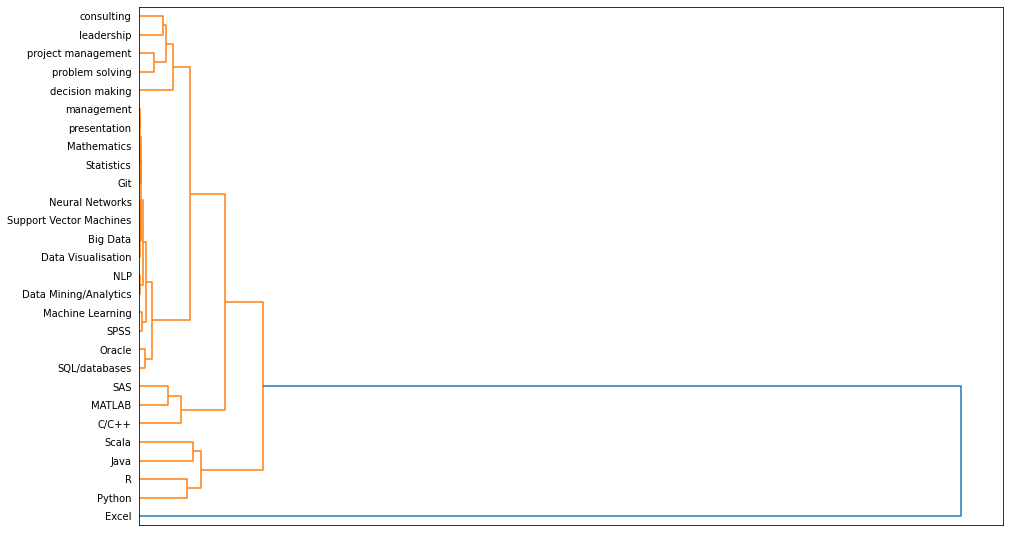

In [13]:
Y = sch.linkage(matrix, method='weighted')

fig = plt.figure(figsize=(30,12))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

Z1 = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
ax1.set_yticklabels(skills.columns)

plt.plot()

In [14]:
course_curricula_sch = pd.DataFrame({'Course':{
                                0: 'Foundations of Project Administration',
                                1: 'Introduction to Business Management',
                                2: 'Mathematical modelling and Statistics',
                                3: 'Foundations of Machine Learning Languages',
                                4: 'Advanced Analytics in Data Science',
                                5: 'Introduction to Deep Learning',
                                6: 'Big Data Science',
                                7: 'NLP and Machine Learning'},
                            'Topics':{
                                0: 'consulting, leadership, project management, excel',
                                1: 'communication, presentation, management, decision making, decision analysis, problem solving',
                                2: 'statistics, probability, statistical modeling, statistical analysis, mathematics, algebra',
                                3: 'Scala, Java, R, Python',
                                4: 'SAS, MATLAB, C++',
                                5: 'Neural Network, SVM',
                                6: 'Big Data, Data Mining, Cloud Computing',
                                7: 'NLP, Machine Learning, SPSS, Data Visualization'}})
course_curricula_sch

,Course,Topics
0,Foundations of Project Administration,"consulting, leadership, project management, excel"
1,Introduction to Business Management,"communication, presentation, management, decis..."
2,Mathematical modelling and Statistics,"statistics, probability, statistical modeling,..."
3,Foundations of Machine Learning Languages,"Scala, Java, R, Python"
4,Advanced Analytics in Data Science,"SAS, MATLAB, C++"
5,Introduction to Deep Learning,"Neural Network, SVM"
6,Big Data Science,"Big Data, Data Mining, Cloud Computing"
7,NLP and Machine Learning,"NLP, Machine Learning, SPSS, Data Visualization"


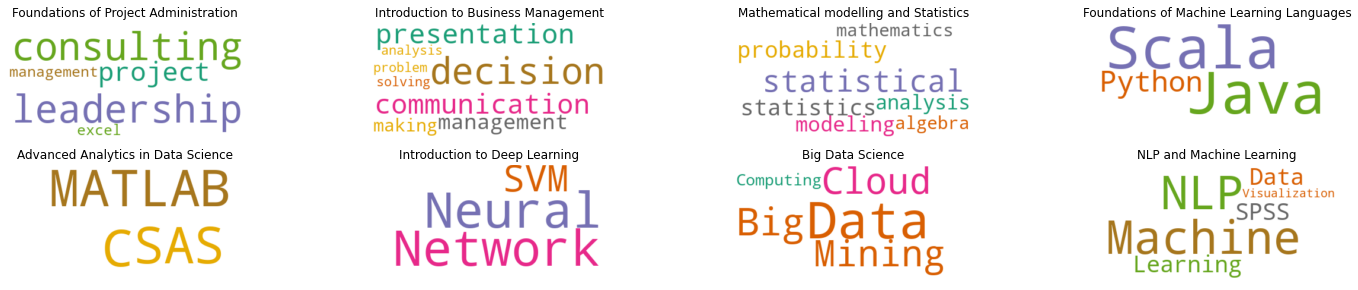

In [15]:
wordcloud = WordCloud(background_color="white",colormap="Dark2")
plt.figure(figsize=(25,10))
for i in range(8):
    wordcloud.generate(text=course_curricula_sch["Topics"][i])   
    plt.subplot(4, 4, i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(course_curricula_sch["Course"][i])
plt.show()

K-Means

In [16]:
data_km = data.copy()

In [17]:
data_km['Title'] = data_km['Title'].apply(lambda x: 'Data Analytics' if 'data analyst' in str(x) else x)
data_km['Title'] = data_km['Title'].apply(lambda x: 'Analyst' if 'analyst' in str(x) else x)

data_km['Title'] = data_km['Title'].apply(lambda x: 'Data Engineer' if 'data engineer' in str(x) else x)

data_km['Title'] = data_km['Title'].apply(lambda x: 'Data Scientist' if 'data scientist' in str(x) else x)
data_km['Title'] = data_km['Title'].apply(lambda x: 'Data Scientist' if 'data science' in str(x) else x)

data_km['Title'] = data_km['Title'].apply(lambda x: 'ML Engineer' if 'machine learning' in str(x) else x)

data_km['Title'] = data_km['Title'].apply(lambda x: 'Consultant' if 'consultant' in str(x) else x)


data_km = data_km[data_km['Title'].isin(['ML Engineer','Consultant', 'Analyst','Data Analytics', 'Data Engineer','Data Scientist'])]
data_km = data_km.reset_index(drop=True)

In [18]:
#extracting skills
skills_found_dict = {}
for i in range(data_km.shape[0]):
  skills_found_dict[i] = {} 
  for skill_category, skills in skills_dict.items():
              category_found = 0  
              for skill in skills:        
                  if data_km["Description"][i].find(skill) != -1: 
                      category_found = 1
              skills_found_dict[i][skill_category] = category_found 

skills_km = pd.DataFrame(skills_found_dict).T
skills_km.insert(loc=0, column='Title',value=data_km['Title'])

data_title = skills_km.groupby('Title').sum().T

In [19]:
data_title['Hard Skills'] = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0]
data_title['Soft Skills'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1]
data_title['Coding Needed']=[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]
data_title['Advanced Skill']=[0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0]
data_title

Title,Analyst,Consultant,Data Analytics,Data Engineer,Data Scientist,ML Engineer,Hard Skills,Soft Skills,Coding Needed,Advanced Skill
Excel,9,0,24,0,6,0,1,0,0,0
Python,3,0,18,0,42,1,1,0,1,0
R,268,1,217,30,136,58,1,0,1,0
Java,0,0,0,0,2,0,1,0,1,0
Scala,1,0,2,0,2,0,1,0,1,0
C/C++,0,0,1,0,2,0,1,0,1,0
MATLAB,1,0,0,0,1,0,1,0,1,0
SAS,3,0,6,0,5,1,1,0,1,1
SQL/databases,93,0,63,0,21,0,1,0,1,0
Oracle,58,0,4,0,0,0,1,0,1,0


In [20]:
s = MinMaxScaler()
data_title_s = s.fit_transform(data_title)
data_title_s = pd.DataFrame(data_title_s)
data_title_s

,0,1,2,3,4,5,6,7,8,9
0,0.033582,0.0,0.110599,0.000000,0.044118,0.000000,1.0,0.0,0.0,0.0
1,0.011194,0.0,0.082949,0.000000,0.308824,0.017241,1.0,0.0,1.0,0.0
2,1.000000,0.5,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.0,0.0
3,0.000000,0.0,0.000000,0.000000,0.014706,0.000000,1.0,0.0,1.0,0.0
4,0.003731,0.0,0.009217,0.000000,0.014706,0.000000,1.0,0.0,1.0,0.0
5,0.000000,0.0,0.004608,0.000000,0.014706,0.000000,1.0,0.0,1.0,0.0
6,0.003731,0.0,0.000000,0.000000,0.007353,0.000000,1.0,0.0,1.0,0.0
7,0.011194,0.0,0.027650,0.000000,0.036765,0.017241,1.0,0.0,1.0,1.0
8,0.347015,0.0,0.290323,0.000000,0.154412,0.000000,1.0,0.0,1.0,0.0
9,0.216418,0.0,0.018433,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0


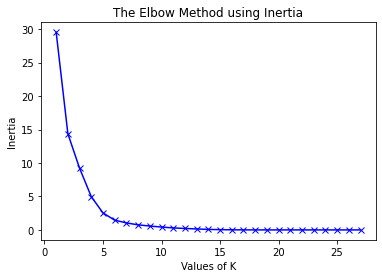

In [21]:
inertias = []
K = range(1, 28)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_title_s)
  
    inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

A k value of 7 is optimum through the elbow method. But since we are required to create 8-10 courses, 8 will be chosen.

In [22]:
# Create KMeans object
kmeans = KMeans(n_clusters=8, random_state=1624)

# Train and predict
cluster = kmeans.fit_predict(data_title_s)
clusters = pd.DataFrame([data_title.index,cluster]).T

clusters = clusters.rename(columns = {0:"Skills",1 :"Cluster"}).sort_values("Cluster")
clusters

,Skills,Cluster
27,consulting,0
22,management,0
17,Neural Networks,1
16,Support Vector Machines,1
15,Big Data,1
10,SPSS,1
7,SAS,1
13,NLP,1
0,Excel,2
20,Mathematics,2


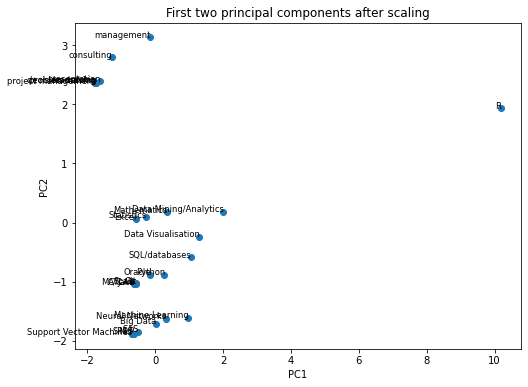

In [23]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(data_title)
plot = plt.scatter(Xt[:,0], Xt[:,1])
for i in range(0,data_title.shape[0]):
     plt.text(Xt[:,0][i]+0.02, Xt[:,1][i], 
     data_title.index[i], horizontalalignment='right', 
     size='small', color='black')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()

In [26]:
course_curricula_km = pd.DataFrame({'Course':{
                                0: 'Introduction to Business Administration',
                                1: 'Foundations of Programming Languages',
                                2: 'Mathematical Modelling',
                                3: 'Advanced Analytics in Data Science',
                                4: 'Statistical Computing Language',
                                5: 'Foundations od Data Analytics and Visualization',
                                6: 'Business Management',
                                7: 'Introduction to Machine Learning'},
                            'Topics':{
                                0: 'presentation,leadership, decision making,project management, problem solving',
                                1: 'Scala, Java, R, Python, Git, MATLAB, Oracle, SQL, C++',
                                2: 'Statistics, Mathematics, Excel',
                                3: 'SAS, SPSS, NLP, Neural Network, Big Data, SVM ',
                                4: 'R-Language',
                                5: 'Data Visualization, Data Mining/Analytics',
                                6: 'management, consulting',
                                7: 'Machine Learning'}})
course_curricula_km

,Course,Topics
0,Introduction to Business Administration,"presentation,leadership, decision making,proje..."
1,Foundations of Programming Languages,"Scala, Java, R, Python, Git, MATLAB, Oracle, S..."
2,Mathematical Modelling,"Statistics, Mathematics, Excel"
3,Advanced Analytics in Data Science,"SAS, SPSS, NLP, Neural Network, Big Data, SVM"
4,Statistical Computing Language,R-Language
5,Foundations od Data Analytics and Visualization,"Data Visualization, Data Mining/Analytics"
6,Business Management,"management, consulting"
7,Introduction to Machine Learning,Machine Learning


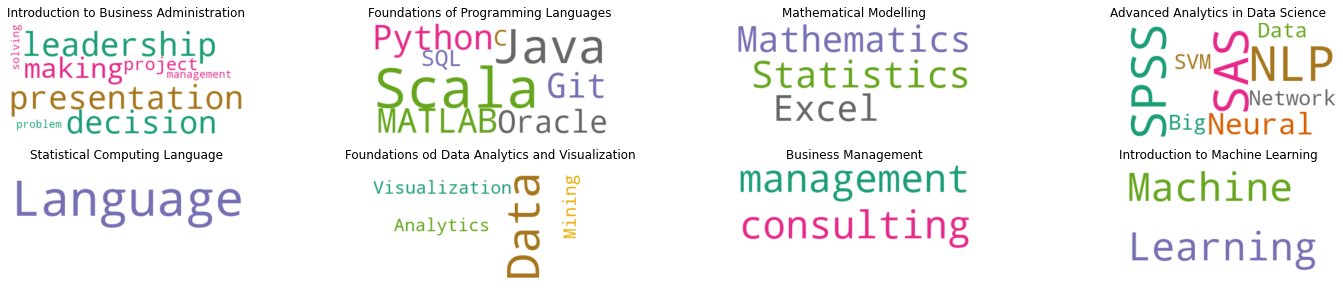

In [27]:

plt.figure(figsize=(25,10))
for i in range(8):
    wordcloud.generate(text=course_curricula_km["Topics"][i])   
    plt.subplot(4, 4, i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(course_curricula_km["Course"][i])
plt.show()